In [41]:
import utils
from pymongo import MongoClient, UpdateOne, ASCENDING
import time
from tqdm import tqdm_notebook as tqdm
import pymongo
from web3 import Web3
from quickblocks import QuickBlocks
import calculations
import holoviews as hv
import importlib
hv.extension('matplotlib')
client = MongoClient('localhost', 27017)
db = client['eth']
accounts = db['accounts']
transactions = db['transactions']
blocks = db['blocks']

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [140]:
provider_ipc = Web3.IPCProvider('/home/mike/.local/share/io.parity.ethereum/jsonrpc2.ipc', timeout=100)
w3 = Web3(provider_ipc)
LATEST = 5950000
STEP = 100000
qb = QuickBlocks('http://localhost:8544', cache=False)

In [141]:
gas_usages = []
gas_limits = []
for start in tqdm(range(0, LATEST, STEP)): 
    match = {'$match':
                {'$and':[
                    {'_id': {'$gte':start}},
                    {'_id': {'$lt':start+STEP}},
                ]}
            }
    group = {'$group':
                {
                    '_id': None,
                    'gasUsed': {'$sum': '$gasUsed'},
                    'gasLimit': {'$sum': '$gasLimit'}
                }
            }
    # for i, r in enumerate(blocks.aggregate([match, group])):
    for i, r in enumerate(blocks.aggregate([match, group])):
        assert i==0
        gas_usages.append(r['gasUsed']/STEP)
        gas_limits.append(r['gasLimit']/STEP)

:Overlay
   .Block_Gas_Use_and_Gas_Limit.Gas_use   :Curve   [x]   (y)
   .Block_Gas_Use_and_Gas_Limit.Gas_limit :Curve   [x]   (y)
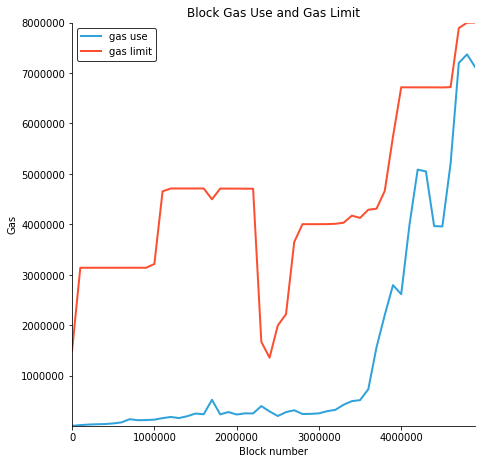

In [99]:
%%output size=200
group = "Block Gas Use and Gas Limit"
use_curve    = hv.Curve((range(0, LATEST, STEP), gas_usages), label='gas use', group=group)
limit_curve = hv.Curve((range(0, LATEST, STEP), gas_limits),label='gas limit', group=group)
options = {'Curve': dict(interpolation='steps-mid'),
           'Overlay': dict(legend_position='bottom_right')}
curve = (use_curve * limit_curve)
curve.options(options)
curve.redim.label(x='Block number', y='Gas')

In [42]:
number_txs = []
for start in tqdm(range(0, LATEST, STEP)): 
    match = {'$match':
                {'$and':[
                    {'_id': {'$gte':start}},
                    {'_id': {'$lt':start+STEP}},
                ]}
            }
    group = {'$group':
                {
                    '_id': None,
                    'number_txs': {'$sum': {'$size': '$transactions'}},
                }
            }
    for i, r in enumerate(blocks.aggregate([match, group])):
        assert i==0
        number_txs.append(r['number_txs']/STEP)


Exception ignored in: <bound method tqdm.__del__ of  60%|██████    | 30/50 [21:17<14:11, 42.59s/it]>
Traceback (most recent call last):
  File "/home/mike/anaconda3/envs/eth/lib/python3.6/site-packages/tqdm/_tqdm.py", line 882, in __del__
    self.close()
  File "/home/mike/anaconda3/envs/eth/lib/python3.6/site-packages/tqdm/_tqdm.py", line 1087, in close
    self._decr_instances(self)
  File "/home/mike/anaconda3/envs/eth/lib/python3.6/site-packages/tqdm/_tqdm.py", line 452, in _decr_instances
    cls.monitor.exit()
  File "/home/mike/anaconda3/envs/eth/lib/python3.6/site-packages/tqdm/_monitor.py", line 50, in exit
    self.join()
  File "/home/mike/anaconda3/envs/eth/lib/python3.6/threading.py", line 1053, in join
    raise RuntimeError("cannot join current thread")
RuntimeError: cannot join current thread


/home/mike/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/axes/_base.py:1551: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


:Overlay
   .Block_Gas_use_and_Gas_Limit_normalized_by_number_of_transactions.Gas_use   :Curve   [x]   (y)
   .Block_Gas_use_and_Gas_Limit_normalized_by_number_of_transactions.Gas_limit :Curve   [x]   (y)
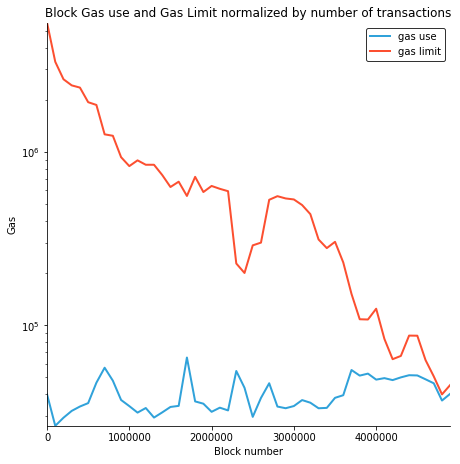

In [98]:
%%output size=200
%%opts Curve [logy=True]

group = "Block Gas use and Gas Limit normalized by number of transactions"
use_curve    = hv.Curve((range(0, LATEST, STEP), [g/n for g,n in zip(gas_usages, number_txs)]), label='gas use', group=group)
limit_curve = hv.Curve((range(0, LATEST, STEP), [g/n for g,n in zip(gas_limits, number_txs)]),label='gas limit', group=group)
options = {'Curve': dict(interpolation='steps-mid'),
           'Overlay': dict(legend_position='bottom_right')}
curve = (use_curve * limit_curve)
curve.options(options)
curve.redim.label(x='Block number', y='Gas')

:Curve   [x]   (y)
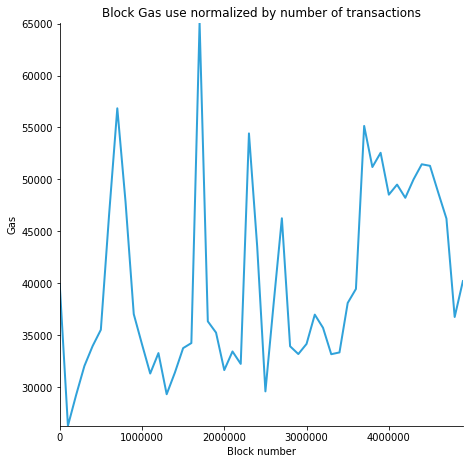

In [95]:
%%output size=200

group = "Block Gas use normalized by number of transactions"
use_curve = hv.Curve((range(0, LATEST, STEP), [g/n for g,n in zip(gas_usages, number_txs)]), group=group)
options = {'Curve': dict(interpolation='steps-mid'),
           'Overlay': dict(legend_position='bottom_right')}
curve = (use_curve)
curve.options(options)
curve.redim.label(x='Block number', y='Gas')

In [130]:
for i in accounts.find({'recipient': {'$exists': True}}):
    print(i)
    break

{'_id': '0xe53c68796212033e4e6f9cff56e19c461eb454f9', 'checksum': '0xe53C68796212033e4E6F9Cff56E19c461eb454F9', 'bytecode': b'', 'eoa': True, 'firstBlock': 0, 'recipient': ['0x533f19009b3d3da2d80a57ad409c7d33ab2142c41e59f063b779df1b27614e93']}


In [139]:
# get the tranasactions within a block interval, grouped by if recipient is EOA, and sum the gas
eoa_gas = []
contract_gas = []
for start in tqdm(range(1, LATEST, STEP)): 
    match = {'$match':
                {'$and':[
                    {'blockNumber': {'$gte':start}},
                    {'blockNumber': {'$lt':start+STEP}},
                ]}
            }
    lookup = {'$lookup':
                 {
                     'from': 'accounts',
                     'localField': 'to',
                     'foreignField': '_id',
                     'as': 'recipient'
                 }
             }
    tx_projection = {'$project':
                        {
                            'gas': '$gas',
                            'gasLimit': '$gasLimit',
                            'recipient': {'$arrayElemAt': ['$recipient', 0]}
                        }
                    }
    recipient_projection = {'$project':
                     {
                         'gas': '$gas',
                         'gasLimit': '$gasLimit',
                         'eoa': '$recipient.eoa'
                     }
                 }
    group = {'$group':
                {
                    '_id': '$eoa',
                    'gas': {'$sum': '$gas'},
                }
            }
    for i, r in enumerate(transactions.aggregate([match, lookup, tx_projection, recipient_projection, group])):
        if r['_id']:
            eoa_gas.append(r['gas'])
        else:
            contract_gas.append(r['gas'])

OperationFailure: Error in $cursor stage :: caused by :: errmsg: "query killed during yield: all indexes on collection dropped"